In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv('./stats.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         226 non-null    object 
 1   segment_size  226 non-null    int64  
 2   hidden_size   226 non-null    int64  
 3   peak          226 non-null    object 
 4   time          226 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.0+ KB


In [21]:
df['peak'].replace('OM', 'inf', inplace=True)
df['peak'] = df['peak'].astype(float)

/tmp/ipykernel_29569/3929616465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak'].replace('OM', 'inf', inplace=True)


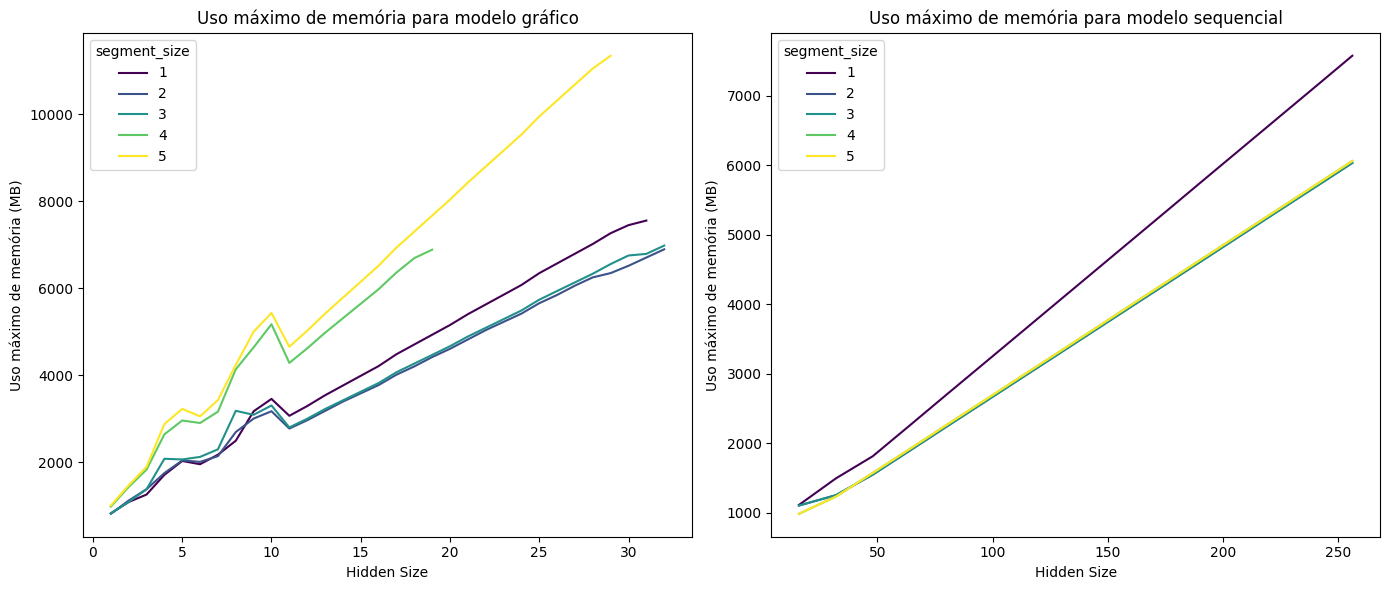

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the 'graph' model
sns.lineplot(data=df.query("model == 'graph'"), x='hidden_size', y='peak', hue='segment_size', palette='viridis', ax=axes[0])
axes[0].set_title('Uso máximo de memória para modelo gráfico')
axes[0].set_xlabel('Hidden Size')
axes[0].set_ylabel('Uso máximo de memória (MB)')

# Plot for the 'sequential' model
sns.lineplot(data=df.query("model == 'sequential'"), x='hidden_size', y='peak', hue='segment_size', palette='viridis', ax=axes[1])
axes[1].set_title('Uso máximo de memória para modelo sequencial')
axes[1].set_xlabel('Hidden Size')
axes[1].set_ylabel('Uso máximo de memória (MB)')
# Show the plot
plt.tight_layout()
plt.savefig('images/hidden_size_x_peak.svg')
plt.show()

In [23]:
df['time'].replace(0, float('inf'), inplace=True)

/tmp/ipykernel_29569/1245426431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time'].replace(0, float('inf'), inplace=True)


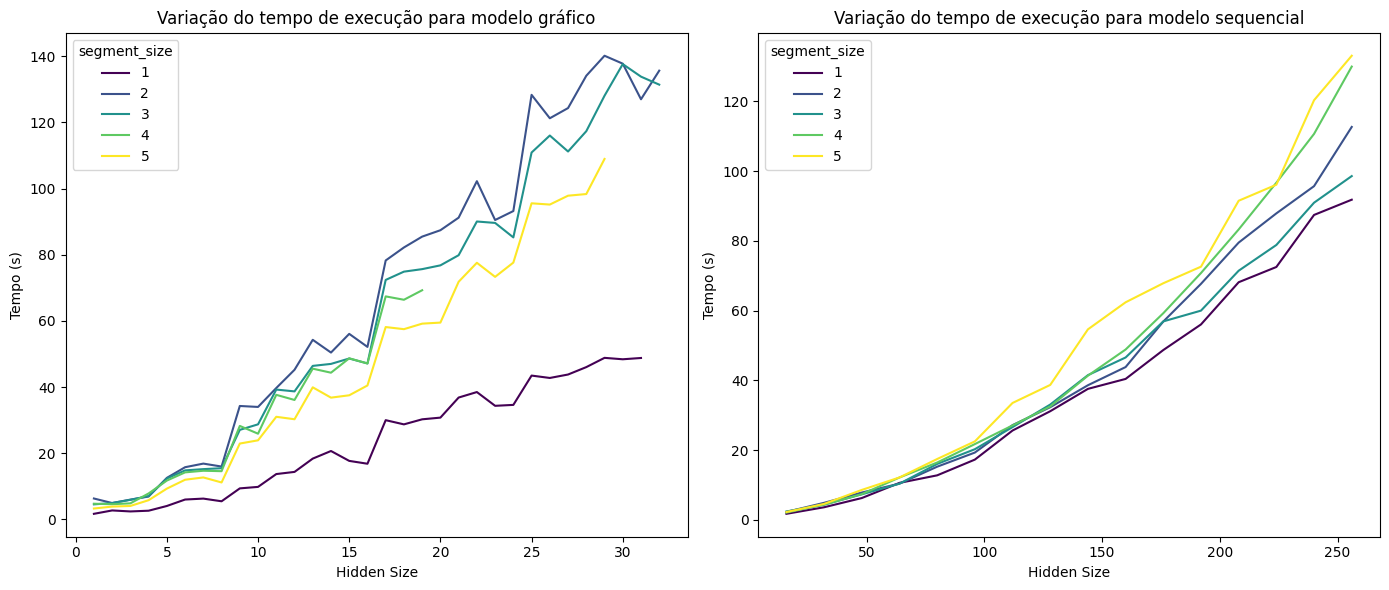

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the 'graph' model
sns.lineplot(data=df.query("model == 'graph'"), x='hidden_size', y='time', hue='segment_size', palette='viridis', ax=axes[0])
axes[0].set_title('Variação do tempo de execução para modelo gráfico')
axes[0].set_xlabel('Hidden Size')
axes[0].set_ylabel('Tempo (s)')


# Plot for the 'sequential' model
sns.lineplot(data=df.query("model == 'sequential'"), x='hidden_size', y='time', hue='segment_size', palette='viridis', ax=axes[1])
axes[1].set_title('Variação do tempo de execução para modelo sequencial')
axes[1].set_xlabel('Hidden Size')
axes[1].set_ylabel('Tempo (s)')

# Show the plot
plt.tight_layout()

plt.savefig('images/hidden_size_x_time.svg')
plt.show()

# Memory x time

In [29]:
df  = pd.read_csv('./time.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3605 non-null   object 
 1   time          3605 non-null   float64
 2   segment_size  3605 non-null   int64  
 3   memory        3605 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 112.8+ KB


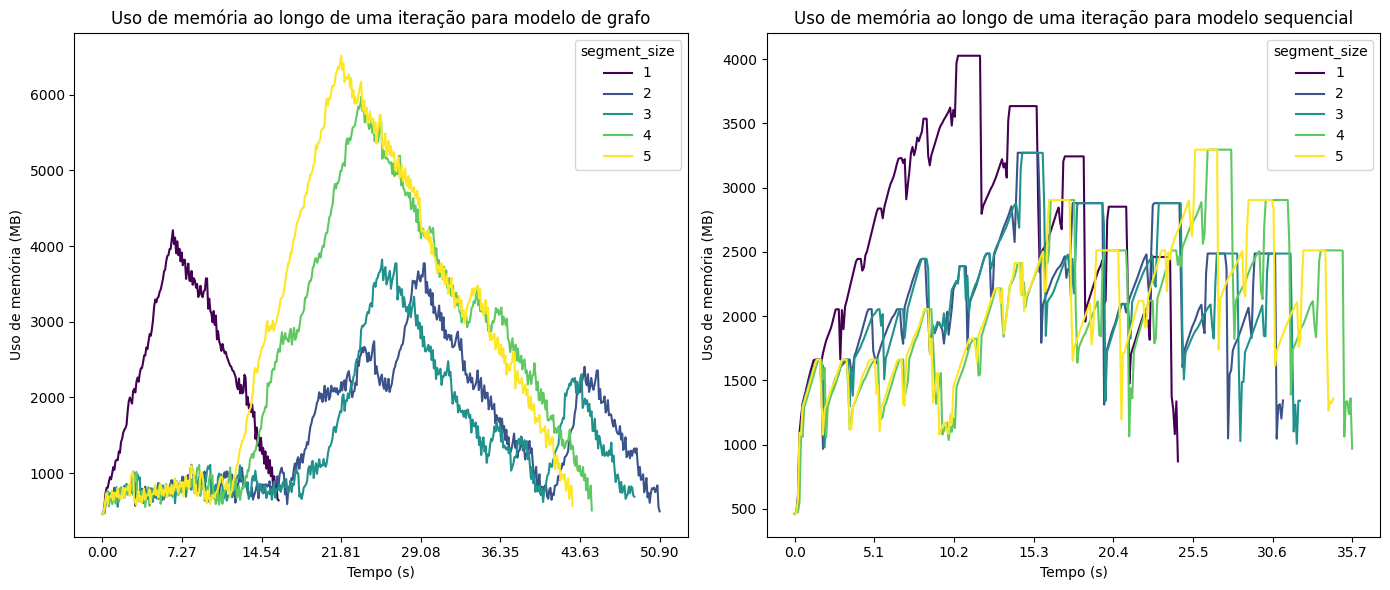

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the maximum time for setting x-axis limits
max_time_seq = df.query("model == 'sequential'")['time'].max()
max_time_graph = df.query("model == 'graph'")['time'].max()
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the 'graph' model
sns.lineplot(data=df.query("model == 'graph'"), x='time', y='memory', hue='segment_size', palette='viridis', ax=axes[0])
axes[0].set_title('Memory usage over time for graph model')
axes[0].set_xticks(np.linspace(0, max_time_graph, 8))
axes[0].set_title('Uso de memória ao longo de uma iteração para modelo de grafo')
axes[0].set_xlabel('Tempo (s)')
axes[0].set_ylabel('Uso de memória (MB)')
# Plot for the 'sequential' model
sns.lineplot(data=df.query("model == 'sequential'"), x='time', y='memory', hue='segment_size', palette='viridis', ax=axes[1])
axes[1].set_xticks(np.linspace(0, max_time_seq, 8))

axes[1].set_title('Uso de memória ao longo de uma iteração para modelo sequencial')
axes[1].set_xlabel('Tempo (s)')
axes[1].set_ylabel('Uso de memória (MB)')
# Show the plot
plt.tight_layout()
plt.savefig('images/time_memory.svg')
plt.show()
